<a href="https://www.kaggle.com/code/mauryashikhar87/eda-1001-inventions-that-changed-the-world?scriptVersionId=218431297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/1001-invention-that-changed-the-worldtime-excel/cleaned_output.xlsx


# doing some univariate analysis

In [3]:
df=pd.read_excel('/kaggle/input/1001-invention-that-changed-the-worldtime-excel/cleaned_output.xlsx')

In [4]:
df.rename(columns={'date(bce)':'date'},inplace=True)

In [5]:
df.sample(5)

,Inventons-,date
802,Jet Boat,1957
683,Philips Screw,1934
494,Electric Chair,1890
134,wheelbarrow,231
836,Kevlar,1965


In [6]:
df['date'].nunique()

335

In [7]:
df['date'].unique()

array([-2600000, -1420000,  -400000,   -35000,   -30000,   -25000,
         -23000,   -20000,   -18000,   -17000,   -15000,   -10000,
          -9500,    -8700,    -7500,    -7000,    -6500,    -6000,
          -5500,    -5000,    -4500,    -4000,    -3500,    -3000,
          -2800,    -2500,    -2180,    -2000,    -1600,    -1500,
          -1420,    -1000,     -750,     -700,     -650,     -550,
           -500,     -425,     -400,     -300,     -260,     -250,
           -240,     -200,     -150,     -100,      -27,       40,
             79,      100,      105,      231,      500,      580,
            589,      700,      787,      800,      806,      868,
            904,      984,      994,     1041,     1094,     1128,
           1150,     1202,     1206,     1250,     1277,     1300,
           1320,     1441,     1450,     1498,     1501,     1508,
           1510,     1540,     1550,     1560,     1564,     1571,
           1582,     1589,     1590,     1605,     1609,     1

In [8]:
df['date'].value_counts()

date
 1971    15
 1901    13
-2500    12
 1891    12
 1968    11
         ..
 1749     1
 1752     1
 1753     1
 1755     1
 2008     1
Name: count, Length: 335, dtype: int64

In [9]:
import matplotlib.pyplot as plt

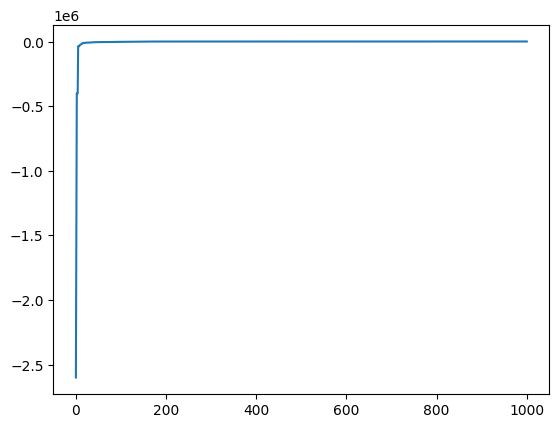

In [10]:
plt.plot(df['date'])

In [11]:
year_count=df['date'].value_counts().sort_index()

In [12]:
year_count

date
-2600000    1
-1420000    1
-400000     3
-35000      3
-30000      1
           ..
 2003       2
 2005       2
 2006       2
 2007       2
 2008       1
Name: count, Length: 335, dtype: int64

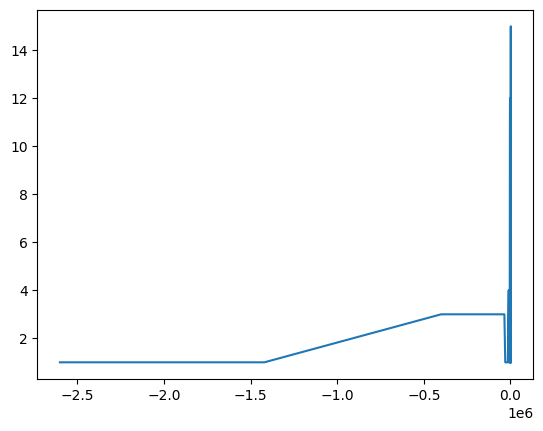

In [13]:
plt.plot(year_count.index,year_count.values)

(array([186.,  43.,  60.,  14.,  11.,  13.,   2.,   4.,   1.,   1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

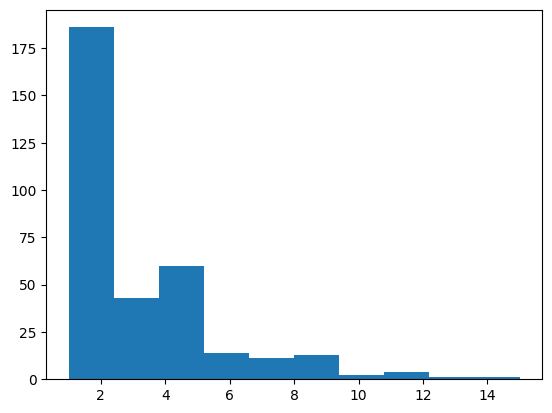

In [14]:
plt.hist(year_count)

In [15]:
frequency=year_count.values

In [16]:
frequency

array([ 1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  3,  4,  2,
        3,  2,  2,  1,  4,  5, 11,  3, 12,  1, 10,  1,  5,  1,  6,  1,  1,
        1,  3,  1,  1,  6,  3,  1,  3,  1,  2,  3,  3,  1,  1,  1,  3,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,
        1,  3,  1,  1,  2,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  1,  1,  3,  1,  1,  1,  2,  2,  1,  2,  4,  2,
        1,  4,  2,  1,  3,  2,  1,  2,  1,  3,  2,  1,  2,  4,  2,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  3,  1,  3,  1,  2,  4,  2,  1,  5,  4,
        1,  1,  2,  5,  4,  1,  4,  2,  1,  4,  5,  2,  4,  3,  1,  1,  3,
        2,  1,  3,  2,  1,  3,  2,  1,  3,  3,  5,  3,  2,  3,  3,  3,  4,
        2,  2,  2,  2,  3,  2,  3,  5,  1,  4,  3,  6,  5,  4,  1, 10,  7,
        3,  4,  9,  8,  8

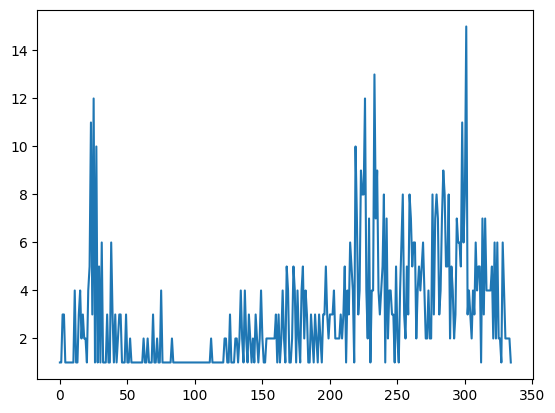

In [20]:
plt.plot(frequency)

In [21]:
import seaborn as sns

In [22]:
def analyze_invention_gaps(df, column_name='date', group_size=10):
    # Get unique years in ascending order
    unique_years = sorted(df[column_name].unique())
    
    # Create groups of inventions
    groups = []
    for i in range(0, len(unique_years), group_size):
        group = unique_years[i:i + group_size]
        if len(group) == group_size:
            groups.append({
                'start_year': group[0],
                'end_year': group[-1],
                'timespan': group[-1] - group[0],
                'inventions': len(group)
            })
    
    # Create DataFrame for visualization
    results_df = pd.DataFrame(groups)
    
    # Create the visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df, x='start_year', y='timespan')
    plt.title(f'Time Span for Every {group_size} Inventions')
    plt.xlabel('Starting Year')
    plt.ylabel('Years to Complete')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(results_df['timespan']):
        plt.text(i, v, str(int(v)), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

# Example usage
# df = pd.DataFrame({'date': [1790, 1795, 1800, 1801, ...]})
# results = analyze_invention_gaps(df, 'date', 10)

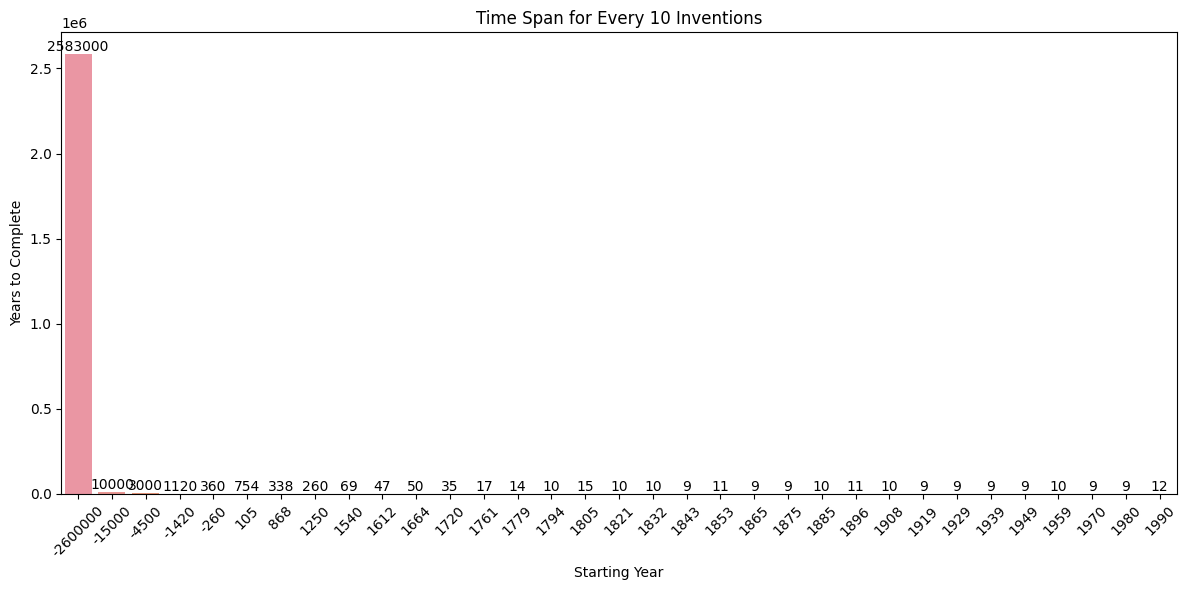

In [23]:
results = analyze_invention_gaps(df, 'date', 10)

count    1.001000e+03
mean    -4.173613e+03
std      9.618012e+04
min     -2.600000e+06
25%      1.794000e+03
50%      1.891000e+03
75%      1.949000e+03
max      2.008000e+03
Name: date, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Date Values Over Index')

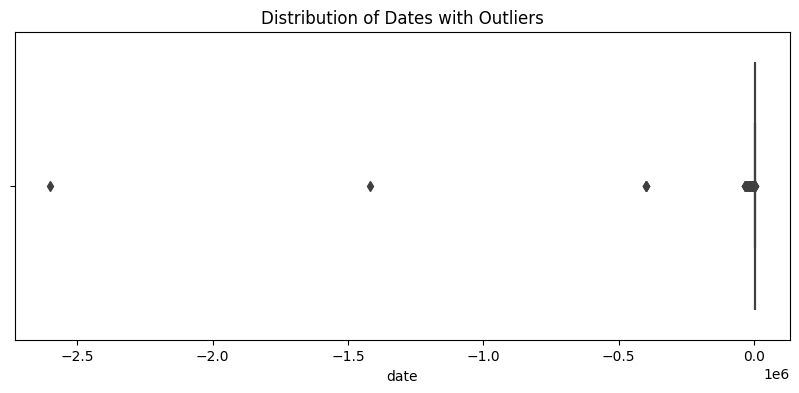

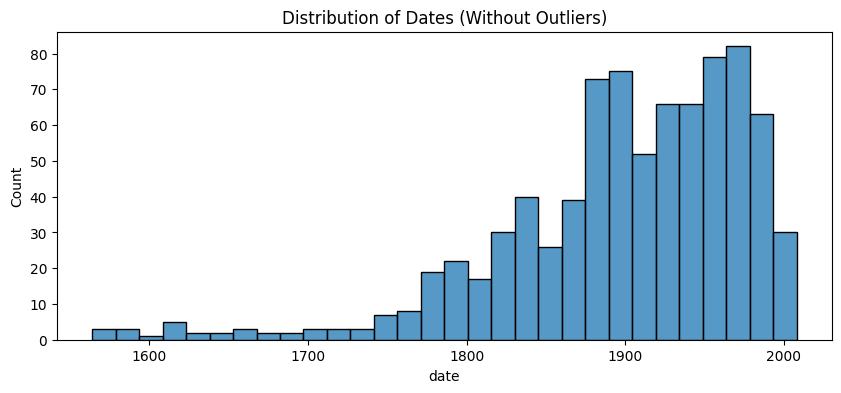

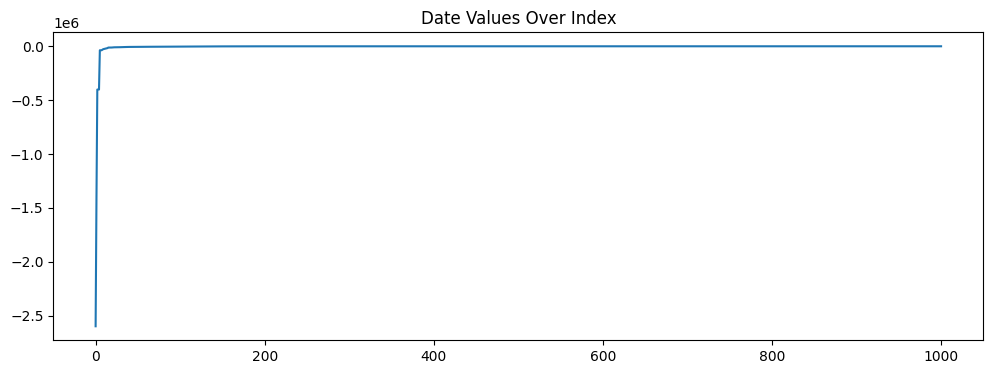

In [25]:
# Identify outliers using IQR
Q1 = df['date'].quantile(0.25)
Q3 = df['date'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Basic statistics
print(df['date'].describe())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['date'])
plt.title('Distribution of Dates with Outliers')

# Histogram without outliers
normal_dates = df[(df['date'] >= lower_bound) & (df['date'] <= upper_bound)]
plt.figure(figsize=(10, 4))
sns.histplot(data=normal_dates, x='date', bins=30)
plt.title('Distribution of Dates (Without Outliers)')

# Time series plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['date'])
plt.title('Date Values Over Index')